In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import scipy
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Hypothesis

If mortgage interest rates increase, then the housing prices will
increase. 

In [2]:
path = r'/Users/brandeefairnot/Library/CloudStorage/OneDrive-Personal/Documents/Final Achievement/'

In [3]:
avgbystate = pd.read_excel(os.path.join(path, 'AvgHomePricebyState.xlsx'), index_col = False)

In [4]:
IntRate = pd.read_excel(os.path.join(path, 'InterestRatedoc.xlsx'), index_col = False)

In [5]:
HPInt = pd.read_excel(os.path.join(path, 'HomePrice_Interest.xlsx'), index_col = False)

## Cleaning up data

In [6]:
#IntRate new table by dropping unneeded columns
rates = IntRate.drop(columns = ['Week','Month', 'Year', 'US 30 yr Rate'])

In [7]:
#remove duplicates
rates = rates.drop_duplicates()
rates

Month YR  Interest Average
0        March 2008            5.9700
4        April 2008            5.9175
8          May 2008            6.0360
13        June 2008            6.3200
17        July 2008            6.4260
..              ...               ...
791        May 2023            6.4250
795       June 2023            6.7140
800       July 2023            6.8400
804     August 2023            7.0720
809  September 2023            7.1200

[187 rows x 2 columns]

In [8]:
#numpy conversion
df_np = HPInt.to_numpy()

In [9]:
#6. reshape data of the HomePrice_Interest table
X = HPInt['2008 Avg Interest Rate'].values.reshape(-1,1)
y = HPInt['2008 Avg Home Price'].values.reshape(-1,1)

In [10]:
#7. split the data into training and testing data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
#create a regression object
regression = LinearRegression()

In [12]:
#train the model on how the training set learns
regression.fit(X_train,y_train)

LinearRegression()

<Axes: xlabel='2008 Avg Interest Rate', ylabel='2008 Avg Home Price'>

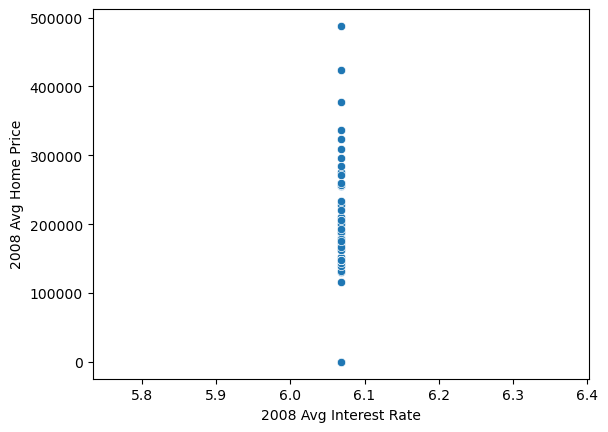

In [13]:
#scatterplot
sns.scatterplot(x = '2008 Avg Interest Rate', y = '2008 Avg Home Price',data = HPInt)

In [14]:
#create a prediction for y on the test set
y_predicted = regression.predict(y_test)

In [15]:
y_predicted 

array([[4.96641140e+09],
       [9.45807145e+09],
       [3.34655927e+09],
       [2.79190352e+09],
       [4.95819279e+09],
       [4.52021363e+09],
       [8.99794825e+04],
       [6.26511956e+09],
       [3.73723801e+09],
       [8.21335510e+09],
       [3.43475831e+09],
       [8.99794825e+04],
       [2.87907666e+09],
       [2.86346953e+09],
       [2.87603948e+09],
       [3.99104673e+09]])

In [16]:
#RMSE
RMSE = mean_squared_error(y_test, y_predicted)

In [17]:
#R2 
r2 = r2_score(y_test, y_predicted)

In [18]:
#11) Check the model performance statistics—MSE and R2 score.

print('Slope:', regression.coef_)
print('Mean squared error:', RMSE)
print('R2 score:', r2)

Slope: [[19385.81023326]]
Mean squared error: 2.195364643392771e+19
R2 score: -1421320198.4958858


### 10) interpretation of how well the line appears  
I realized my line for the interest rates won't change because i have averaged my interest rates for all the months of each tear into so each ryear will only have 1 rate. 

In [ ]:
# predicted y values with the actual y values in a dataframe.
df = HPInt({'Actual':y_test, 'Predicted':y_predicted})

### 13) My thoughts on the model

The line will only be vertically in one spot because my X variable is the interest rate which is static for each year. In a more advanced graph, I could have the interest rates, home prices and states all in one chart to display the full picture. 